In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./data/data_prep.csv')

In [3]:
data.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country,country_corrected
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0.0,United Arab Emirates,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,0.0,United Arab Emirates,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,1000.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0.0,Oman,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,1000.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,2.0,United Kingdom,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,1000.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,2.0,United Kingdom,United Kingdom


In [4]:
# Show cols name
print(data.columns)

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country', 'country_corrected'],
      dtype='object')


### Dropping unnecessary columns

In [4]:
# Drop the following columns: business_id, timezone, place_id, place_link, state, Friday_morning,
# Friday_afternoon ... Thursday_evening, geo_cluster
data = data.drop(columns=['business_id', 'timezone', 'place_id', 'place_link', 'state', 
        'Friday_morning', 'Friday_afternoon', 'Friday_evening', 'Saturday_morning',
       'Saturday_afternoon', 'Saturday_evening', 'Sunday_morning',
       'Sunday_afternoon', 'Sunday_evening', 'Monday_morning',
       'Monday_afternoon', 'Monday_evening', 'Tuesday_morning',
       'Tuesday_afternoon', 'Tuesday_evening', 'Wednesday_morning',
       'Wednesday_afternoon', 'Wednesday_evening', 'Thursday_morning',
       'Thursday_afternoon', 'Thursday_evening','geo_cluster'])

data.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city',
       'verified', 'country', 'country_corrected'],
      dtype='object')

### Transforming some other columns to Binary

In [6]:
#  phone number to 0/1, website to 0/1,  (depedning on the length is bigger than 2 or its value is equal "Unknown")
#  full_adress to 0/1, 

data['phone_number'] = data['phone_number'].apply(lambda x: 0 if x == "Unknown" else 1)
data['website'] = data['website'].apply(lambda x: 0 if x == "Unknown" else 1)
data['full_address'] = data['full_address'].apply(lambda x: 0 if x == "Unknown" else 1)


Text(0.5, 1.0, 'Full address')

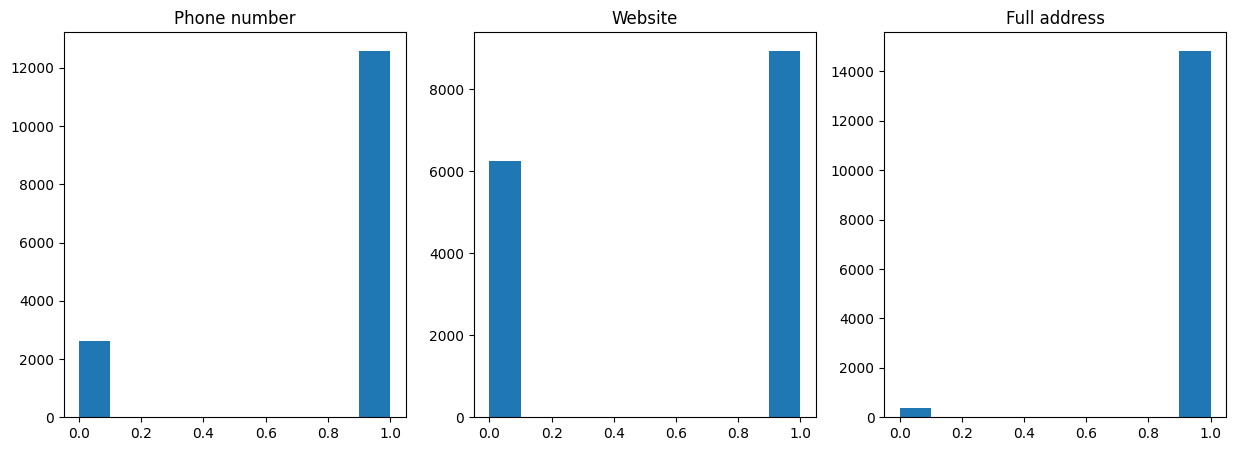

In [7]:
# Plot phone number, website and full adress histograms:
# Plot in one figure. Give titles to each plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(data['phone_number'])
axs[0].set_title('Phone number')
axs[1].hist(data['website'])
axs[1].set_title('Website')
axs[2].hist(data['full_address'])
axs[2].set_title('Full address')

### Note: some columns that are necessary only for visualization
- name
- city
- country
- country_corrected

They will stay in the dataset, but to be dropped before the clustering process.

<br>

Columns to be further engineered:
- types
- opening hours (Monday - Sunday)

<br>

Columns that are already ok:
- latitude
- longitude
- review_count
- rating
- verified
- phone_number
- website
- full_address

In [8]:
data["Monday"].value_counts().index[0:100]

Index(['Hours not available', 'Open 24 hours', 'Closed', '10 AM-10 PM',
       '9 AM-6 PM', '9 AM-5 PM', '8 AM-5 PM', '9 AM-9 PM', '8 AM-8 PM',
       '10 AM-6 PM', '8 AM-6 PM', '9 AM-10 PM', '8 AM-12 AM', '8 AM-10 PM',
       '9 AM-7 PM', '10 AM-8 PM', '9 AM-12 AM', '10 AM-11 PM', '10 AM-7 PM',
       '10 AM-9 PM', '9 AM-11 PM', '10 AM-5 PM', '9 AM-8 PM', '10 AM-12 AM',
       '8 AM-11 PM', '7 AM-12 AM', '7 AM-11 PM', '8 AM-1 PM', '8 AM-9 PM',
       '9:30 AM-9:30 PM', '9 AM-5:30 PM', '9 AM-1 PM', '7 AM-10 PM',
       '8 AM-7 PM', '8 AM-4 PM', '7 AM-7 PM', '6 AM-12 AM', '8:30 AM-6 PM',
       '8:30 AM-5 PM', '8:30 AM-5:30 PM', '9 AM-11:30 PM', '8 AM-2 AM',
       '7 AM-6 PM', '6 AM-11 PM', '11 AM-12 AM', '6 AM-10 PM', '9 AM-4 PM',
       '8 AM-5:30 PM', '11 AM-6 PM', '10 AM-2 AM', '7:30 AM-3:30 PM',
       '9 AM-1 AM', '12 PM-12 AM', '8 AM-11:30 PM', '9 AM-2 AM', '7 AM-5 PM',
       '11 AM-11 PM', '1-5:30 PM', '10 AM-4 PM', '11 AM-7 PM', '9 AM-2 PM',
       '10 AM-1 AM', '10 AM-11:30 

In [9]:
s = data.sample(200)

import pandas as pd
import numpy as np
import re


# Definiowanie funkcji pomocniczych
def get_time_segments(opening_hours):
    # Definiowanie segmentów czasowych
    morning = (6, 12)
    afternoon = (12, 18)
    evening = (18, 24)
    
    segments = {
        'morning': 0,
        'afternoon': 0,
        'evening': 0
    }
    
    if opening_hours in ['Hours not available']:
        return {segment: np.nan for segment in segments}
    elif opening_hours == 'Closed':
        return segments
    elif opening_hours == 'Open 24 hours':
        return {segment: 1 for segment in segments}
    
    # Obsługa godzin bez AM/PM
    if 'AM' not in opening_hours and 'PM' in opening_hours:
        opening_hours = re.sub(r'(\d+)-(\d+ PM)', r'\1 AM-\2', opening_hours)
    
    times = re.findall(r'(\d{1,2}(?::\d{2})?) (AM|PM)', opening_hours)
    
    if len(times) == 2:
        start_time, start_period = times[0]
        end_time, end_period = times[1]
        
        # Konwersja do godzin 24-godzinnych
        start_hour = int(start_time.split(':')[0]) + (12 if start_period == 'PM' and int(start_time.split(':')[0]) != 12 else 0)
        end_hour = int(end_time.split(':')[0]) + (12 if end_period == 'PM' and int(end_time.split(':')[0]) != 12 else 0)
        
        # Uwzględnienie półgodzin
        if ':' in start_time:
            start_minute = int(start_time.split(':')[1])
        else:
            start_minute = 0
        
        if ':' in end_time:
            end_minute = int(end_time.split(':')[1])
        else:
            end_minute = 0
        
        # Klasyfikacja godzin otwarcia
        if morning[0] <= start_hour < morning[1] or (start_hour == morning[1] and start_minute == 0) or (morning[0] < end_hour < morning[1]):
            segments['morning'] = 1
        if afternoon[0] <= start_hour < afternoon[1] or (start_hour == afternoon[1] and start_minute == 0) or (afternoon[0] < end_hour < afternoon[1]):
            segments['afternoon'] = 1
        if evening[0] <= start_hour < evening[1] or (start_hour == evening[1] and start_minute == 0) or (evening[0] < end_hour < evening[1]):
            segments['evening'] = 1
        if start_hour < morning[0] and end_hour >= evening[0]:
            segments = {segment: 1 for segment in segments}
        else:
            if start_hour < morning[1] and end_hour > morning[1]:
                segments['morning'] = 1
            if start_hour < afternoon[1] and end_hour > afternoon[1]:
                segments['afternoon'] = 1
            if start_hour < evening[1] and end_hour > evening[1]:
                segments['evening'] = 1
    
    return segments

# Przetwarzanie kolumn dla każdego dnia tygodnia
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']: 
    day_segments = s[day].apply(get_time_segments)
    day_df = pd.DataFrame(day_segments.tolist(), index=s.index)
    s[f'{day}_morning'] = day_df['morning']
    s[f'{day}_afternoon'] = day_df['afternoon']
    s[f'{day}_evening'] = day_df['evening']

# Usunięcie oryginalnych kolumn godzin otwarcia
# s.drop(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)  

s

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,Friday,...,Thursday_evening,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening
12106,1,Kashish 4,1,25.266548,55.381207,5.0,4.2,0,Night club,9 PM-3 AM,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6815,0,The Irrational Library,1,52.379761,4.623920,32.0,4.4,1,"Public library, Cultural association",11 AM-6 PM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,0,Gothai,1,25.296693,55.369106,45.0,4.0,0,Restaurant,10 AM-11 PM,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8578,0,Right Estates Premium Brokerage,1,25.291957,55.365513,32.0,4.4,0,Real estate agency,Hours not available,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,1,Green Leaf Laundry,1,25.300109,55.374837,67.0,3.8,1,Laundry service,4-11 PM,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11240,1,Prima Gold,1,25.267687,55.317478,1.0,4.0,0,Jewelry store,2-10 PM,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12244,1,Saki night club,1,25.242906,55.304200,10.0,5.0,1,Night club,9 PM-4 AM,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7296,1,Die TUI in Frankfurt,1,50.102139,8.681178,25.0,4.7,1,Travel agency,10 AM-6 PM,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
527,1,Ayub ali auto elect & a/c repairing,1,25.311894,55.630008,3.0,4.3,0,Auto repair shop,Hours not available,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
s[['Monday_morning', 'Monday_afternoon', 'Monday_evening', 'Monday']].head(30)

,Monday_morning,Monday_afternoon,Monday_evening,Monday
10217,NaN,NaN,NaN,Hours not available
8974,NaN,NaN,NaN,Hours not available
7888,1.0,1.0,1.0,Open 24 hours
7974,1.0,1.0,1.0,Open 24 hours
13658,1.0,1.0,1.0,9 AM-8 PM
13792,NaN,NaN,NaN,Hours not available
6846,1.0,1.0,1.0,8:30 AM-8:30 PM
1947,1.0,1.0,1.0,10 AM-8 PM
3130,NaN,NaN,NaN,Hours not available
9076,NaN,NaN,NaN,Hours not available


In [82]:
s[['Monday_morning']].value_counts()

Monday_morning
1.0               128
0.0                15
dtype: int64

In [83]:
s[['Monday_morning']].isna().sum()

Monday_morning    57
dtype: int64

Change Monday - Sunday to binary (there is info vs there is no info)

In [10]:
# Change Monday - Sunday to binary (there is info vs there is no info
# data['phone_number'] = data['phone_number'].apply(lambda x: 0 if x == "Unknown" else 1)

data['Monday'] = data["Monday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Tuesday'] = data["Tuesday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Wednesday'] = data["Wednesday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Thursday'] = data["Thursday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Friday'] = data["Friday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Saturday'] = data["Saturday"].apply(lambda x: 0 if x == "Hours not available" else 1)
data['Sunday'] = data["Sunday"].apply(lambda x: 0 if x == "Hours not available" else 1)

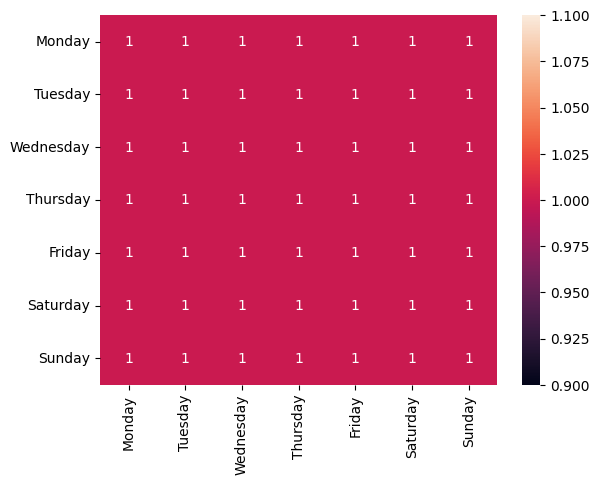

In [11]:
s = data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
# Macierz korelacji
import seaborn as sns

sns.heatmap(s.corr(), annot=True)
plt.show()


In [12]:
# Zastąp kolumny Monday - Sunday jedną kolumną. Jeśli w Monday jest 1, to w nowej kolumnie
# Też ma być 1, jeśli 0, to w nowej też 0
data['open_info'] = data['Monday']
data.drop(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, inplace=True)
data.head()

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,verified,country,country_corrected,open_info
0,0,حصن الظفرة Al Dhafra Fort,1,23.733973,53.980629,58.0,4.7,0,Museum,Abu Dhabi,False,United Arab Emirates,United Arab Emirates,1
1,1,Rafiullah,1,23.657332,53.741881,3.0,3.0,0,Museum,Abu Dhabi,False,United Arab Emirates,United Arab Emirates,1
2,1,National Museum of Oman,1,23.611601,58.593728,1000.0,4.6,1,"National museum, Museum, Tourist attraction",Muscat,True,Oman,Oman,1
3,1,Science and Industry Museum,1,53.477136,-2.254582,1000.0,4.4,1,"Science museum, Heritage museum, Museum, Touri...",Manchester,True,United Kingdom,United Kingdom,1
4,1,"Beamish, the Living Museum of the North",1,54.884752,-1.659321,1000.0,4.8,1,"Open air museum, Museum, Tourist attraction",Stanley,True,United Kingdom,United Kingdom,1


/Users/hubert/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


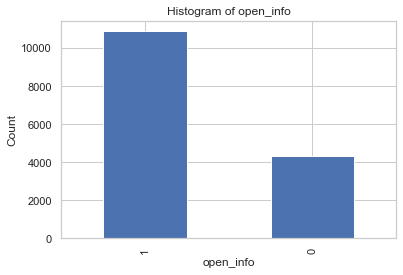

In [11]:
# Plot histogram of open_info
# Use white background
import seaborn as sns
sns.set(style="whitegrid")
data['open_info'].value_counts().plot(kind='bar')
plt.xlabel('open_info')
plt.ylabel('Count')
plt.title('Histogram of open_info')
plt.show()

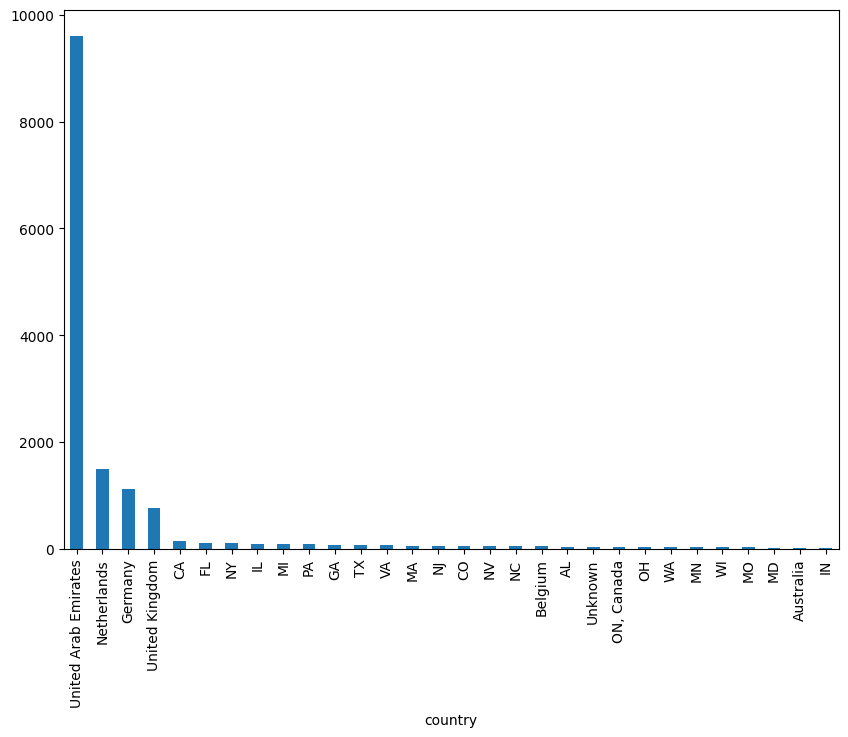

In [41]:
# plot country distribution
figure = plt.figure(figsize=(10, 7))
data['country'].value_counts().head(30).plot(kind='bar')
plt.show()

In [228]:
# %pip install geopy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Geopy is slow, as we already know.

In [28]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Inicjalizacja geolokalizatora
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Funkcja do uzyskania nazwy kraju na podstawie współrzędnych
# def get_country(lat, lon):
#     try:
#         location = geolocator.reverse((lat, lon), language='en')
#         address = location.raw['address']
#         country = address.get('country', '')
#         return country
#     except:
#         return None

# # Używanie RateLimiter do ograniczenia liczby zapytań na sekundę
# geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# s = data.sample(3)
# # Uzyskiwanie nazw krajów dla każdej pary współrzędnych
# country_names = s.apply(lambda row: get_country(row['latitude'], row['longitude']), axis=1)

# print(country_names)

758      None
9294     None
14614    None
dtype: object


In [14]:
#divide data to test,train validate with seed 42
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_validate = train_test_split(df_train, test_size=0.25, random_state=42)

In [15]:
#describe the df_train
df_train.describe()

,phone_number,full_address,latitude,longitude,review_count,rating,website,open_info
count,9118.000000,9118.000000,9118.000000,9118.000000,9118.00000,9118.000000,9118.000000,9118.000000
mean,0.824304,0.976640,33.107267,24.528576,151.61417,4.283768,0.589055,0.716275
std,0.380583,0.151054,12.207285,50.589459,279.55329,0.680637,0.492032,0.450829
min,0.000000,0.000000,-45.577163,-150.040000,1.00000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,25.259958,5.279545,8.00000,4.100000,0.000000,0.000000
50%,1.000000,1.000000,25.310213,55.287202,32.00000,4.400000,1.000000,1.000000
75%,1.000000,1.000000,44.612694,55.370509,113.00000,4.700000,1.000000,1.000000
max,1.000000,1.000000,64.413678,174.629698,1000.00000,5.000000,1.000000,1.000000


## Preprocessing 'types' column

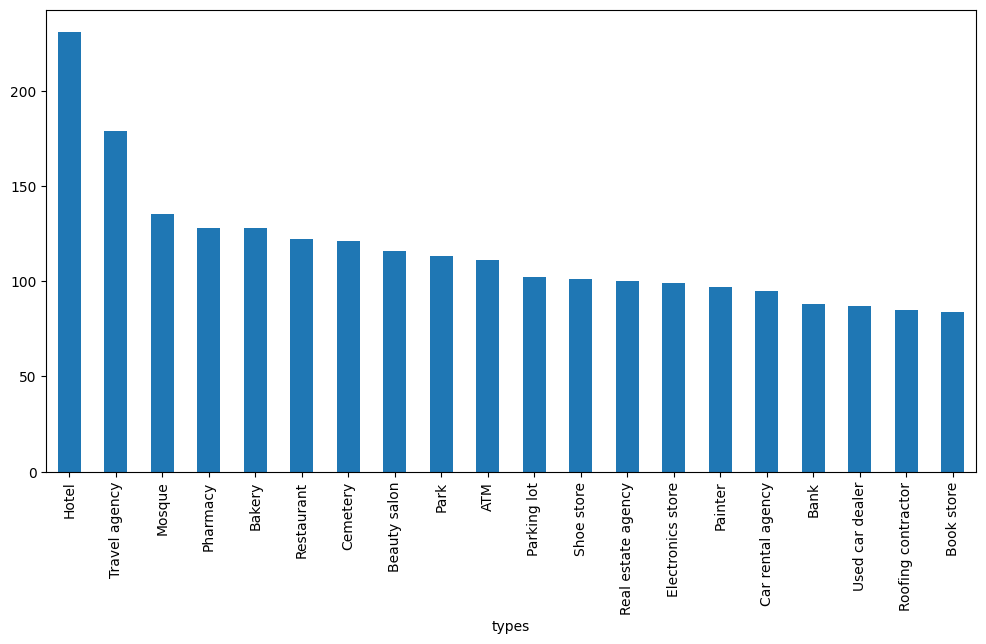

In [16]:
#prepare a plot where you show top 10 occuring types
fig = plt.figure(figsize=(12, 6))
df_train['types'].value_counts().head(20).plot(kind='bar')
plt.show()


In [17]:
# Show types which contain a comma in their name
df_train[df_train['types'].str.contains(",")]['types'].value_counts()

types
Bank, ATM                                                                                                         57
Car rental agency, Van rental agency                                                                              52
Casino, Amusement center, Gambling house                                                                          44
Roofing contractor, Service establishment                                                                         43
Park, Tourist attraction                                                                                          37
                                                                                                                  ..
Life insurance agency, Auto insurance agency, Health insurance agency, Home insurance agency, Insurance agency     1
Tour operator, Sightseeing tour agency, Tourist attraction, Travel agency                                          1
Outlet store, Clothing store, Outlet mall                 

In [18]:
# Show random 5 rows where there is comma in type
df_train[df_train['types'].str.contains(",")].sample(5)

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,verified,country,country_corrected,open_info
3199,1,مكتب أمل حسن كرم للمحاماة و الاستشارات القانونية,1,25.326099,55.378585,8.0,3.8,0,"Legal affairs bureau, Consultant, Criminal jus...",Sharjah,True,United Arab Emirates,United Arab Emirates,1
13955,0,Bharat Restaurant Sharjah,1,25.298690,55.626464,6.0,4.7,0,"Cafe, Restaurant, Coffee store, Hotel, Lunch r...",Sharjah,True,United Arab Emirates,United Arab Emirates,0
2504,1,The Pickles Restaurant - Best North Indian Res...,1,25.299902,55.369596,210.0,4.2,0,"North Indian restaurant, South Indian restaurant",Sharjah,True,United Arab Emirates,United Arab Emirates,1
13202,1,AL NABEEHA LADIES FASHION DESIGNING LLC,1,25.276327,55.311819,3.0,4.7,0,"Fashion designer, Embroidery service, Embroide...",Dubai,True,United Arab Emirates,United Arab Emirates,1
8146,1,bed and pillows,1,25.302089,55.367443,86.0,4.2,1,"Mattress store, Bed shop, Bedding store, Bedro...",Sharjah,True,United Arab Emirates,United Arab Emirates,1


In [19]:
# Show all the values from 'types' column that do NOT contain a comma
df_train[~df_train['types'].str.contains(",")]['types'].value_counts()

types
Hotel                                 231
Travel agency                         179
Mosque                                135
Pharmacy                              128
Bakery                                128
                                     ... 
Pharmaceutical products wholesaler      1
Bus charter                             1
Fish store                              1
Loss adjuster                           1
Tour operator                           1
Name: count, Length: 462, dtype: int64

In [20]:
#%pip install sentence_transformers

In [21]:
# Get all type values from df_train, split by comma if sth is there, strip, and then get unique values
types = df_train['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
len(types)



1674

In [145]:
types_test= df_test['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
len(types_test)

1066

In [23]:
%pip install sentence_transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 30.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6

### Embeddings for 'types' column and visualisations

/home/iwaniukooo/.local/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/home/iwaniukooo/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


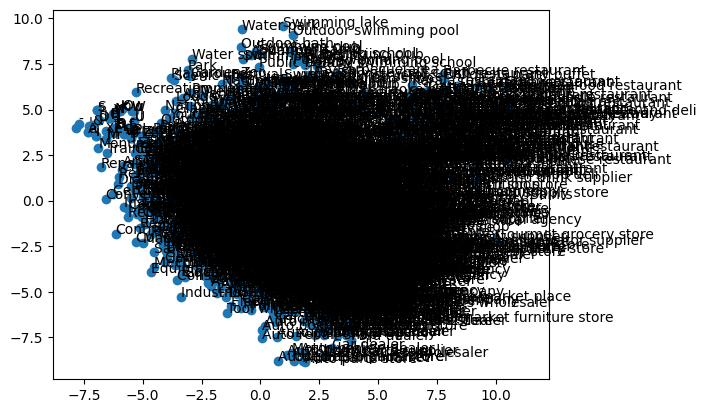

In [24]:
# import sbert, get all unique values of type which do not contain comma, prepare embeddings for them, do PCA and plot the result
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# unique_types = df_train[~df_train['types'].str.contains(",")]['types'].unique()
unique_types=df_train['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
embeddings = model.encode(unique_types)

pca = PCA(n_components=2)
pca.fit(embeddings)
embeddings_pca = pca.transform(embeddings)
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1])
for i, txt in enumerate(unique_types):
    plt.annotate(txt, (embeddings_pca[i,0], embeddings_pca[i,1]))

# Embeddings of all unique types presented on 2D plot (achieved with PCA)

In [147]:
unique_types_test=df_test['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
embeddings_test = model.encode(unique_types_test)

In [26]:
#for the pca above, i changeds my mind, ddo a plotly dashboard where anootate is on hover

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=embeddings_pca[:,0], y=embeddings_pca[:,1], mode='markers', text=unique_types))
fig.show()

# Show the plotly dashboard with the embeddings of all unique types presented on 2D plot (achieved with PCA)


In [25]:
# There are 1627 unique types in total. Such as 'Department store', 'Bedding store', 'Hotel'.
unique_types,len(unique_types)

(array(['H', 'o', 't', ..., 'Tools', 'Filipino restaurant',
        'Horse boarding stable'], dtype=object),
 1674)

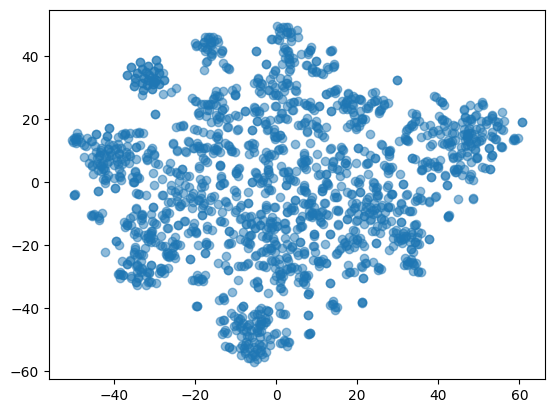

In [27]:
# Plotting embeddings of all unique types using TSNE with n_components = 2

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(embeddings)
# Plot it with alpha = 0.5
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], alpha=0.5)

# for i, txt in enumerate(unique_types):
#     plt.annotate(txt, (embeddings_tsne[i,0], embeddings_tsne[i,1]))

Some groups of types form evident clusters, meaning that this types are similar in meaning.

### Get clusters from embeddings
This clusters represent more general types of places (cluster_type).

In [148]:
unique_types_test_len=len(unique_types_test)

In [28]:
# Prepare k-means clustering of embeddings and show the plot of 
# k (number of clusters) vs Inertia

# Show the number of unique values without comma and save it in a variable
# unique_types = df_train[~df_train['types'].str.contains(",")]['types'].unique()
# unique_types_len = len(unique_types)
unique_types_len=len(unique_types)

from sklearn.cluster import KMeans
inertia = []
for k in range(1, unique_types_len,50 ):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)


KeyboardInterrupt: 

In [29]:
# Number of unique types once again
unique_types_len

1674

Choosing the right number of clusters.

Elbow-rule:

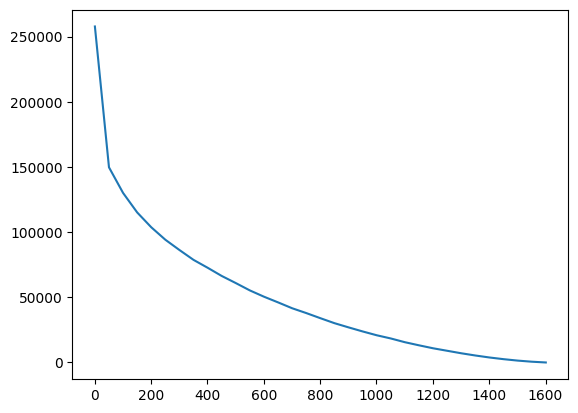

In [ ]:
# Plot of k vs Inertia for number of clusters = 1, 51, 101, 151, 201, 251 ...
plt.plot(range(1, unique_types_len,50 ), inertia)
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('k vs Inertia')
plt.show()

Silhouette scores:

In [30]:
# Prepare silhoutte score for each k-means clusterization and 
# then show the plot of k vs silhoutte score.
# Here k = 2, 52, 102, 152, 202, 252 ...

from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, unique_types_len ,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    silhouette.append(silhouette_score(embeddings, kmeans.labels_))
#plot, give x and y labels, y axis from o to 0.5


In [31]:
len(silhouette)

34

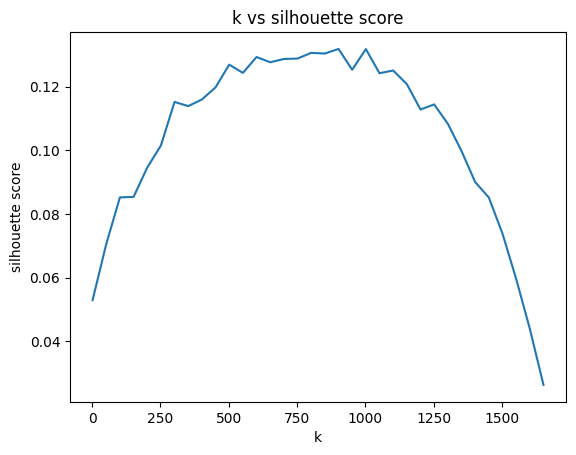

In [32]:
# Plot sillhouette for k = 2, 52, 102, 152, 202...
plt.plot(range(2, unique_types_len ,50), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('k vs silhouette score')
plt.show()


In [33]:
# Results of silhouette vs k where only some types were taken into account.
# THIS IS AN OLD VISUALISATION KEPT ONLY FOR REFERENCE !!!

# plt.plot(range(2, unique_types_len ), silhouette)
# plt.xlabel('k')
# plt.ylabel('Silhouette score')
# plt.show()
# silhouette.index(max(silhouette)), max(silhouette)


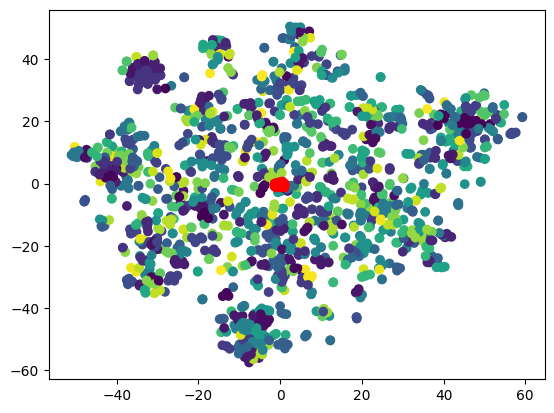

In [166]:
# Do k-means clusterization with k=600 and show the tsne plot of the embeddings with clusterization
kmeans = KMeans(n_clusters=500)
kmeans.fit(embeddings)
embeddings_tsne = tsne.fit_transform(embeddings)
#plot in and show centroids with red colour
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# This does not look the best. Maybe we should consider less number of clusters.
# We can also try another clustering algorithm, such as DBSCAN.
# Also, are the embeddings normalized?

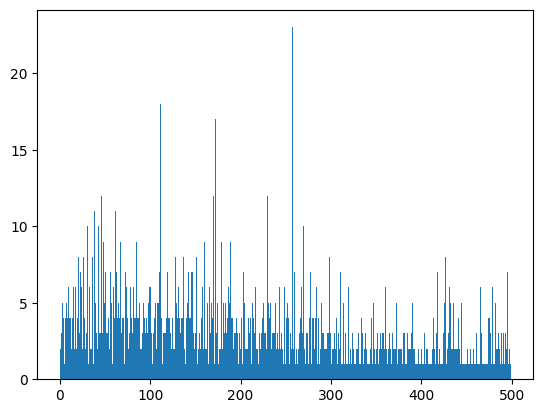

In [167]:
# Run k-kemans for k=100 and show the plot of cluster size
# This shows how big are those clusters that we formed

kmeans = KMeans(n_clusters=500)
kmeans.fit(embeddings)
plt.hist(kmeans.labels_, bins=500)
plt.show()


In [40]:
#calculate the percentage of bins which have more than 1 element
len([i for i in kmeans.labels_ if i > 1])/len(kmeans.labels_)

#count bin whuich have 1 element
len([i for i in kmeans.labels_ if i == 1])


9

In [168]:
#for the 10 class with the biggest cluster show the names of the types and also print the number the claster
cluster_size = np.bincount(kmeans.labels_)
biggest_clusters = np.argsort(cluster_size)[-10:]
for cluster in biggest_clusters:
    print(cluster,unique_types[kmeans.labels_ == cluster])



270 ['Doctor' 'Orthopedic surgeon' 'Bariatric surgeon' 'Lasik surgeon'
 'Surgical oncologist' 'Oncologist' 'Vascular surgeon' 'Surgeon'
 'Anesthesiologist' 'Surgical products wholesaler']
42 ['Real estate agency' 'Real estate consultant' 'Real estate attorney'
 'Industrial real estate agency' 'Real estate agent'
 'Real estate rental agency' 'Commercial real estate agency'
 'Real estate developer' 'Real estate appraiser' 'Real estate surveyor']
61 ['Furniture store' 'Furniture accessories' 'Furniture maker'
 'Furniture manufacturer' 'Furniture wholesaler' 'Furniture repair shop'
 'Amish furniture store' 'Used furniture store'
 'Furniture accessories supplier' 'Shop supermarket furniture store'
 'Furniture rental service']
38 ['Watch repair service' 'Machine maintenance service'
 'Machine repair service' 'Appliance repair service' 'Repair service'
 'Salvage yard' 'Mechanic' 'Screen repair service' 'Repairs'
 'Installation service' 'Tools']
230 ['Family restaurant' 'Momo restaurant' 'Wok 

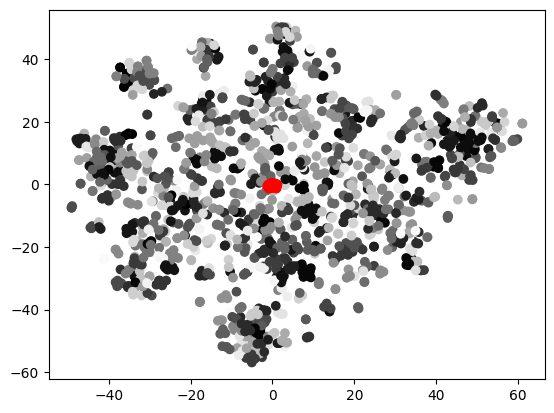

In [42]:
# For k=500 prepare tsne and show cluster but color is from white to black
# Is something wrong with the centroids? 

embeddings_tsne = tsne.fit_transform(embeddings)
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=kmeans.labels_, cmap='gray')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')


In [45]:
unique_types

array(['H', 'o', 't', ..., 'Tools', 'Filipino restaurant',
       'Horse boarding stable'], dtype=object)

In [46]:
#unique_types
kmeans.labels_

array([  1, 150, 150, ..., 194, 363, 144], dtype=int32)

In [169]:
from collections import Counter
from difflib import get_close_matches
import numpy as np

def assign_cluster(row, unique_types, clusters):
    types = [t.strip() for t in row['types'].split(',')]
    matched_types = [get_close_matches(t, unique_types.tolist(), n=1) for t in types]
    matched_clusters = [clusters[np.where(unique_types == mt[0])[0][0]] for mt in matched_types if mt]
    return Counter(matched_clusters).most_common(1)[0][0] if matched_clusters else -1

df_train['cluster_type'] = df_train.apply(lambda row: assign_cluster(row, unique_types, kmeans.labels_), axis=1)

In [171]:
df_test['cluster_type'] = df_test.apply(lambda row: assign_cluster(row, unique_types, kmeans.labels_), axis=1)

In [170]:
df_train['cluster_type'].value_counts()

cluster_type
132    333
427    266
13     229
426    221
8      214
      ... 
43       1
351      1
91       1
169      1
156      1
Name: count, Length: 318, dtype: int64

In [183]:
#count all unique clusters in df_train
len(df_train['cluster_type'].unique())

318

In [175]:
# Show df_train types column where cluster is 90
df_train[df_train['cluster_type'] == 8]['types']


13612      Car dealer, Auto machine shop, Golf cart dealer
13379                                      Used car dealer
13475                                      Used car dealer
13424                                      Used car dealer
13396    Used car dealer, Car dealer, Car repair and ma...
                               ...                        
13393                                           Car dealer
13690                                      Used car dealer
13637                                      Used car dealer
13419                                      Used car dealer
13535    Hyundai dealer, Auto parts store, Auto repair ...
Name: types, Length: 214, dtype: object

In [176]:
df_test[df_test['cluster_type'] == 8]['types']

13422                                      Used car dealer
13384    Auto broker, Car dealer, Toyota dealer, Used c...
13619    Toyota dealer, Car dealer, Car detailing servi...
13651                                      Used car dealer
13514                                           Car dealer
13695            Auto auction, Car dealer, Used car dealer
13660                                      Used car dealer
13398                                      Used car dealer
13590                                           Car dealer
13506    Car dealer, Car finance and loan company, Car ...
13468    Ford dealer, Auto repair shop, Car dealer, Car...
13790                                      Used car dealer
13373                                      Used car dealer
13589    Toyota dealer, Auto parts store, Auto tune up ...
13792                                           Car dealer
13404                                      Used car dealer
13412    Car dealer, Auto parts store, Auto repair shop.

In [177]:
df_test['cluster_type'].value_counts()

cluster_type
132    130
427     88
118     85
13      75
44      75
      ... 
458      1
292      1
465      1
484      1
63       1
Name: count, Length: 233, dtype: int64

## Recommendations - additional stuff

In [49]:
%pip install geopy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 9.0 MB/s eta 0:00:00
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.

In [178]:
# get 1 random row. get longitude and latitude. On df_train calculate the distance from it. show valuyes from closest to largest with the same cluster
import geopy.distance
import random
# row = df_train.sample(1)
row = df_test.sample(1)
coords_1 = (row['latitude'].values[0], row['longitude'].values[0])
distances = df_train.apply(lambda x: geopy.distance.distance(coords_1, (x['latitude'], x['longitude'])).km, axis=1)
df_train['distance'] = distances


# print me please row[name,"types","latitude","longitude","cluster"]
row[['name', 'types', 'latitude', 'longitude', 'cluster_type']]


,name,types,latitude,longitude,cluster_type
12628,Field Hospital Ajman,Hospital,25.417969,55.498456,7


In [179]:
df_temp = df_train[df_train['cluster_type'] == row['cluster_type'].values[0]].sort_values('distance')
df_temp.head()[['name', 'types', 'latitude', 'longitude', 'cluster_type','distance']]

,name,types,latitude,longitude,cluster_type,distance
12559,Thumbay University Hospital مستشفى ثومبي الجامعي,"Hospital, Cardiologist, Day care center, Denta...",25.418737,55.500067,7,0.183059
12656,Sheikh Khalifa Medical City Ajman (SKMCA),Hospital,25.417384,55.496047,7,0.250895
12671,Sheikh Khalifa Hospital - Women and Children,Hospital,25.417299,55.495937,7,0.264078
12575,THUMBAY MEDICITY,Hospital,25.418322,55.501672,7,0.325929
12655,Medical College (College of Medicine) - Ajman ...,University hospital,25.412869,55.504239,7,0.811026


## Skupiska

In [112]:
#for all lotitude, langitude search best k and plot shilouette score
from sklearn.metrics import silhouette_score
silhouette = []




for k in range(2, df_train.shape[0],500 ):
    kmeans = KMeans(n_clusters=k)
    # k menas fit pair longitude, latitude
    kmeans.fit(df_train[['longitude', 'latitude']])
    silhouette.append(silhouette_score(df_train[['longitude', 'latitude']], kmeans.labels_))
#plot, give x and y labels, y axis from o to 0.5



/home/iwaniukooo/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning:

Number of distinct clusters (8786) found smaller than n_clusters (9002). Possibly due to duplicate points in X.



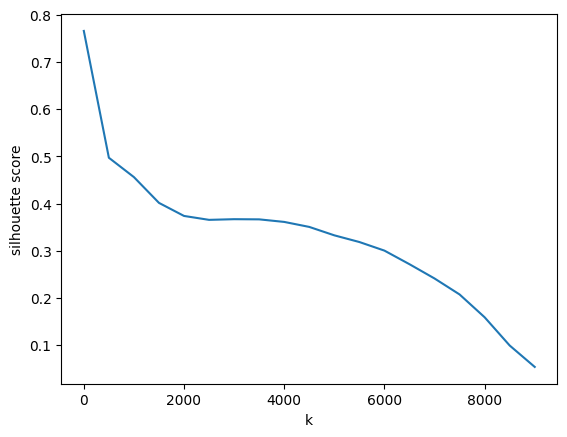

(0, 0.7657623965370709)

In [113]:
#plot shilouette score
plt.plot(range(2, df_train.shape[0],500), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

#print max score and argument
silhouette.index(max(silhouette)), max(silhouette)





In [134]:
from sklearn.cluster import KMeans
kmeans_geo = KMeans(n_clusters=15)
# k menas fit pair longitude, latitude
kmeans_geo.fit(df_train[['longitude', 'latitude']])

KMeans(n_clusters=15)

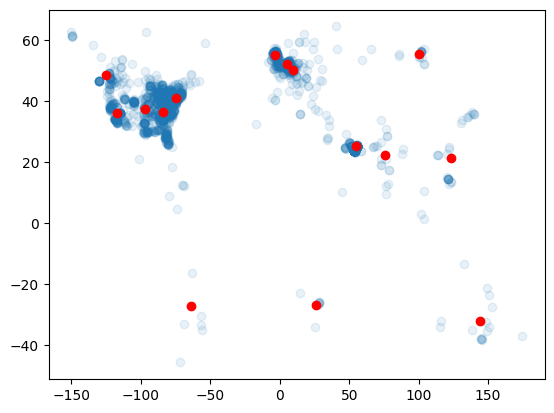

In [135]:
# on the word map show centroids of clusters
plt.scatter(df_train['longitude'], df_train['latitude'],alpha=0.1)
plt.scatter(kmeans_geo.cluster_centers_[:,0], kmeans_geo.cluster_centers_[:,1], color='red')


In [74]:
# #for each row in df_train calculate the distance to the closest centroid and save it in column distance_to_centroid
# distances = kmeans_geo.transform(df_train[['longitude', 'latitude']])
# df_train['distance_to_centroid'] = distances.min(axis=1)



In [142]:
#if exist distance to centroid column, drop it
if 'distance_to_centroid' in df_train.columns:
    df_train.drop('distance_to_centroid', axis=1, inplace=True)
    
if 'distance' in df_train.columns:
    df_train.drop('distance', axis=1, inplace=True)

In [137]:
centroids = kmeans_geo.cluster_centers_
centroids.shape

(15, 2)

In [187]:


# Haversine function to calculate distance in kilometers between two points
def haversine(lat1, lon1, lat2, lon2):
    # R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return (dlat**2 + dlon**2)**0.5
    # return R * c

# Function to find the closest centroid and its distance
def min_distance_to_centroid(row, centroids):
    lat, lon = row['latitude'], row['longitude']
    distances = [haversine(lat, lon, centroid[0], centroid[1]) for centroid in centroids]
    return min(distances)

# Apply the function to each row in df_train and create the new column
df_train['distance_to_centroid'] = df_train.apply(min_distance_to_centroid, centroids=centroids, axis=1)


In [180]:
df_test['distance_to_centroid'] = df_test.apply(min_distance_to_centroid, centroids=centroids, axis=1)

In [188]:
df_train['distance_to_centroid'].describe()

count    9118.000000
mean        0.430291
std         0.316695
min         0.035118
25%         0.293058
50%         0.294403
75%         0.352776
max         2.246619
Name: distance_to_centroid, dtype: float64

In [181]:
df_test['distance_to_centroid'].describe()

count    3040.000000
mean        0.437221
std         0.323503
min         0.046946
25%         0.293081
50%         0.294495
75%         0.354170
max         2.229043
Name: distance_to_centroid, dtype: float64

In [189]:
#show the percentage od total set where distance to centroid is bigger than 1
(df_train['distance_to_centroid'] > 1).mean()


0.0867514805878482

In [143]:
df_train.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'city', 'verified',
       'country', 'country_corrected', 'open_info', 'cluster_type'],
      dtype='object')

In [193]:
# TO BE DONE AFTER WHOLE PREPROCESSING

# train_set, v_t_set = train_test_split(
# data, test_size=0.3, random_state=42, stratify=data["cluster_type"])

# validation_set, test_set = train_test_split(
# v_t_set, test_size=0.4, stratify=v_t_set["cluster_type"], random_state=42)

# validation_set.to_csv("data/validation_set.csv", index=False)
# test_set.to_csv("data/test_set.csv", index = False)
df_train.to_csv("data/train_set.csv", index = False)

In [191]:
#if there is distance column, remove
if 'distance' in df_train.columns:
    df_train.drop('distance', axis=1, inplace=True)

In [192]:
df_train.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'city', 'verified',
       'country', 'country_corrected', 'open_info', 'cluster_type',
       'distance_to_centroid'],
      dtype='object')

In [182]:
df_test.to_csv("data/test_set.csv", index = False)